### Reanalysis of Chen & Wyble, 2015

Chen and Wyble published an interesting paper (2015) where they demonstrate that participants cannot report attributes of attended stimuli unless the participants are previously informed that this attribute is important. For instance, you wouldn't remember the color of the apple if you had had just told someone the shape. I would have expected the opposite, so ... cool!

After reading the paper (you can check it out at http://wyblelab.com/publications), I became curious whether participants might unconsciously retain some information about these forgotten attributes. Chen and Wyble posted their data to databrary.com (https://nyu.databrary.org/volume/79), so I downloaded the data and did some quick analyses that you see here! I want to commend Chen and Wyble for sharing their data. This is something everyone should start doing (including me). 

Below, I will start by showing I can replicate Chen and Wyble's analyses, then I will investigate whether there's a trace of unconscious memory for the "forgotten" features. 


##### References
Chen, H., & Wyble, B. (2015). Amnesia for Object Attributes Failure to Report Attended Information That Had Just Reached Conscious Awareness. Psychological science, 26(2),203-210.

Wyble, B. (2014). Amnesia for object attributes: Failure to report attended information that had just reached conscious awareness. Databrary. Retrieved November 22, 2015 from http://doi.org/10.17910/B7G010

#### Load relevant libraries and write analysis functions

I'll start by loading the python libraries that I'll use throughout analyses. 

In [1]:
import numpy as np, sys, scipy.stats, pandas as pd, os, os.path, csv #loading useful libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
pd.options.display.mpl_style = 'default' #load matplotlib for plotting
plt.style.use('ggplot') #im addicted to ggplot. so pretty.
mpl.rcParams['font.family'] = ['Bitstream Vera Sans']

Here are some quick functions I wrote for running different statistical tests and plotting the data. I won't explain this code, but encourage you to look through it later if you're wondering how I did any of the analyses. 

In [2]:
def print_tests(series1, series2): #this function just presents normality and t-tests. 
    import scipy, numpy as np #the function does these tests with arcsin(sqrt(acc)) to help with normality
    normTest2 = scipy.stats.shapiro(np.arcsin(np.sqrt(series1))-np.arcsin(np.sqrt(series2)))
    Test2 = scipy.stats.ttest_rel(np.arcsin(np.sqrt(series1)), np.arcsin(np.sqrt(series2)))
    Test3 = scipy.stats.wilcoxon(np.arcsin(np.sqrt(series1)), y=np.arcsin(np.sqrt(series2)))
    print '\t normality test adj. Test value: %s P-value: %s' % (str(np.round(normTest2[0],2)), 
                                                                 str(np.round(normTest2[1],4)))
    if normTest2[1] > 0.1: print '\t T-test adj. Test value: %s P-value: %s' % (str(np.round(Test2[0],2)), 
                                                                                str(np.round(Test2[1],4)))
    if normTest2[1] <= 0.1: print '\t Wilcoxon. Test value: %s P-value: %s' % (str(np.round(Test3[0],2)),
                                                                               str(np.round(Test3[1],2)))
    
def print_tests_ChiSq(series): #this function just presents normality and t-tests. 
    import scipy, numpy as np #the function does these tests with arcsin(sqrt(acc)) to help with normality
    Test1 = scipy.stats.chisquare(series[1], f_exp = 0.25)
    Test2 = scipy.stats.chisquare(series[2], f_exp = 0.25)
    print '\t Surprise Test. Comparison to Chance: %s P-value: %s' % (str(np.round(Test1[0],4)),
                                                                      str(np.round(Test1[1],4)))
    print '\t After Surprise Test. Comparison to Chance: %s P-value: %s' % (str(np.round(Test2[0],4)),
                                                                            str(np.round(Test2[1],4)))
    x = scipy.stats.chi2_contingency([[sum(series[1]==1),sum(series[2]==1)], [sum(series[1]==0),sum(series[2]==0)]],
                                     correction=False) 
    print '\t Chi-Square Comparison: %s P-value: %s' % (str(np.round(x[0],4)),str(np.round(x[1],4)))
    
def Analysis_and_Plot(tableRT2, CIs): #this function plots the data and writes the results, including stats tests
    PlotFrame = pd.DataFrame([tableRT2.mean()])
    PlotFrame.columns = ['Presurprise', 'Surprise', 'Post surprise']
    PlotFrame2 = pd.DataFrame([CIs])
    PlotFrame2.columns = ['Presurprise', 'Surprise', 'Post surprise']
    PlotFrame.plot(ylim = [0, 1], yerr=PlotFrame2, kind='bar')
    plt.xticks(range(1), ['Trial Type'], rotation=0);

    print '---------------------------------'
    print 'Mean Presurprise: %s' % (str(round(np.mean(tableRT2[0]),2)))
    print 'Mean Surprise: %s' % (str(round(np.mean(tableRT2[1]),2)))
    print 'Mean Postsurprise: %s' % (str(round(np.mean(tableRT2[2]),2)))
    print 'Presurprise - Surprise: %s' % (str(round(np.mean(tableRT2[0])-np.mean(tableRT2[1]),2)))
    print 'Postsurprise - Surprise: %s' % (str(round(np.mean(tableRT2[2])-np.mean(tableRT2[1]),2)))
    print 'Postsurprise - Presurprise: %s' % (str(round(np.mean(tableRT2[0])-np.mean(tableRT2[1]),2)))
    print '---------------------------------'
    print 'Presurprise vs Surprise'
    print_tests(tableRT2[1],tableRT2[0])
    print 'Postsuprise vs Surprise'
    print_tests(tableRT2[2],tableRT2[1])
    print 'Presurprise vs Postsurprise'
    print_tests(tableRT2[0],tableRT2[2])
    
def Analysis_and_Plot_2(tableRT2, CIs): #this function also plots the data and prints results.
    PlotFrame = pd.DataFrame([tableRT2.mean()]) #I could probably consolidate these functions, but whatever. This works.
    PlotFrame.columns = ['Surprise', 'Postsurprise']
    PlotFrame.plot(ylim = [0, 1], kind='bar')#yerr=PlotFrame2, kind='bar')
    plt.xticks(range(1), ['Trial Type'], rotation=0);

    print '---------------------------------'
    print 'Mean Surprise: %s' % (str(round(np.mean(tableRT2[1]),2)))
    print 'Mean Postsurprise: %s' % (str(round(np.mean(tableRT2[2]),2)))
    print 'Postsurprise - Surprise: %s' % (str(round(np.mean(tableRT2[2])-np.mean(tableRT2[1]),2)))
    print '---------------------------------'
    print 'Postsurprise vs Surprise'
    print_tests_ChiSq(tableRT2)
    
def Analysis_and_Plot_3(tableRT2, CIs): #another plotting function...i should really consolidate these.
    PlotFrame = pd.DataFrame([tableRT2.mean()])
    PlotFrame.columns = ['Match', 'Mismatch']
    PlotFrame2 = pd.DataFrame()
    PlotFrame2['Match'] = pd.DataFrame([CIs])
    PlotFrame2['Mismatch'] = pd.DataFrame([CIs])
    PlotFrame.plot(ylim = [0, 1], yerr=PlotFrame2, kind='bar')
    plt.xticks(range(1), ['Trial Type'], rotation=0);

    #disp_tab = np.round(tableRT2,2)
    #disp_tab['Match-Mismatch'] = disp_tab[1] - disp_tab[2]
    #print disp_tab

    print '---------------------------------'
    print 'Mean match: %s' % (str(round(np.mean(tableRT2[1]),4)))
    print 'Mean mismatch: %s' % (str(round(np.mean(tableRT2[2]),4)))
    print 'Match - Mismatch: %s' % (str(round(np.mean(tableRT2[1])-np.mean(tableRT2[2]),4)))
    print '---------------------------------'
    print 'Match vs Mismatch'
    print_tests(tableRT2[1],tableRT2[2])
    
def OneWayConfInterval(table): #Calculates confidence intervals for a one way anova, this is Cousineau, Morey ect
    import scipy.stats, numpy
    ParticipantsMeans = []
    STEs = []
    CIs = []
    for participant in table.index:
        mean = []
        for condition in xrange(numpy.shape(table)[1]): #there's definitely a better way to do this, but this works...
            mean.append(np.array(table[table.index==participant][condition]))
        ParticipantsMeans.append(sum(mean)/len(mean))
    ConfMeans = numpy.zeros(shape=numpy.shape(table))
    for counter, participant in enumerate(table.index):
        for condition in xrange(numpy.shape(table)[1]):
            ConfMeans[counter][condition] = table[table.index==participant][condition]-\
            ParticipantsMeans[counter]+numpy.array(ParticipantsMeans).mean()
    for counter, column in enumerate(ConfMeans.T):
        STEs.append(numpy.std(column, ddof=1)/numpy.sqrt(len(column)))
        CIs.append(STEs[counter]*scipy.stats.t.isf(0.025, len(ConfMeans)-1))
    return CIs

def SimpleComparisonCI(table): #confidence interval for pairwise comparisons - masson & loftus, Baguley (2012)
    import scipy.stats, math
    ttest = scipy.stats.ttest_rel(table[1], table[2])
    MeanDiff_byT = abs((table[1].mean()-table[2].mean())/ttest[0])
    CI = MeanDiff_byT*scipy.stats.t.isf(0.025, len(table)-1)*math.pow(2,0.05)/2
    return CI

#### Experiment 1

Next, load Experiment 1 data

In [3]:
filename = 'Exp1.csv' #looking at Exp1 data first. 

if sys.platform == 'linux2': #is this my linux laptop
    path = '/home/dan-laptop/Documents/Databrary/Wyble_PsychSci'
elif sys.platform == 'darwin': #is this my mac work comp    
    path = '/Users/danvatterott/Dropbox Encore/Dropbox/Databrary/Wyble_PsychSci'

os.chdir(path)

df = pd.read_csv(filename)

df.columns = ['Sub#', 'Block', 'Trial#', 'TarCol', 'Tar_Iden','Tar_Loc', 'Col_Resp', 'Iden_Resp', 'Loc_Resp', 
             'Col_Acc', 'Iden_Acc', 'Loc_Acc'] #naming the columns of the data file.

The data is loaded, lets just take a quick look at the data after loading it in. 

In [4]:
df[0:5]

,Sub#,Block,Trial#,TarCol,Tar_Iden,Tar_Loc,Col_Resp,Iden_Resp,Loc_Resp,Col_Acc,Iden_Acc,Loc_Acc
0,6,1,2,1,2,4,0,0,2,0,0,0
1,6,1,3,3,4,3,0,0,3,0,0,1
2,6,1,4,1,3,1,0,0,1,0,0,1
3,6,1,5,3,1,4,0,0,4,0,0,1
4,6,1,6,2,2,1,0,0,1,0,0,1


I want to create a new variable. 

Before explaining the new variable, I should explain a little about Chen and Wyble's experiment. Half the participants were instructed to find the letter among numbers and the other half were instructed to find the number among letters. 4 items were briefly flashed on the screen (150 ms) then participants reported where the target item had been. Each of the 4 items was a different color. 

Participants reported target location for 155 trials. On the 156th trial, the participants reported the target location then (to their surprise) reported what specific letter/number the target was and what color it was. Even though participants knew where the target was, they had no idea what either the target's letter/number or color were. They had "forgotten" what the target was (even though they must have known what the target was when they initially located it). 

The new variable will code whether the trial is a "pre-surprise" trial (trials 1-155), a surprise trial (trial 156) or the trial after the surprise (trial 157).

I'll call this variable "TrialType"

TrialType: 0=Presurprise; 1=Surprise Trial; 2=Postsurprise trials.

In [5]:
df['TrialType'] = np.where(df['Trial#']<156, 0, np.where(df['Trial#']==156, 1, 2))
df['TrialType2'] = np.where(df['Trial#']<156, 0, np.where(df['Trial#']==156, 1, np.where(df['Trial#']==157, 2, -1)))

#### Experiment 1: Replicating Chen & Wyble's (2015) analyses

Lets just take a quick look at overall accuracy. Make sure everyone is doing ok on the task. Below I plot the mean accuracy of each participant...looks like participant 23 struggled a little. Chen and Wyble (2015) notes that no participants were excluded or replaced. 

I might have replaced participant 23 since his/her accuracy is easily 2.5 standard deviations below the mean accuracy (I print this value below)...seems like participant 23 was doing something different in this task.

mean accuracy
0.89
standard deviation of accuracies
0.07
2.5 standard deviations below mean accuracy
0.71


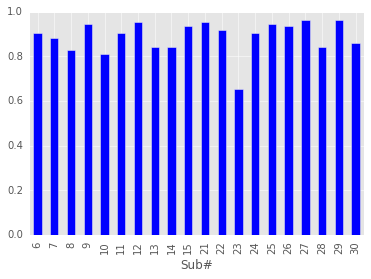

In [6]:
tableAcc = df.pivot_table(values='Loc_Acc', index='Sub#', aggfunc=np.mean)
#print tableAcc
print 'mean accuracy'
print np.round(np.mean(tableAcc),2)
print 'standard deviation of accuracies'
print np.round(np.std(tableAcc),2)

print '2.5 standard deviations below mean accuracy'
print np.round(np.mean(tableAcc)-2.5*np.std(tableAcc),2)

tableAcc.plot(ylim = [0, 1], kind='bar');

Lets look at participants' performance when asked to identify the target's location. I will plot performance as mean accuracy in the presurprise,surprise, and postsurprose trials. 

I will also run some quick statistical tests. For these tests, I take the arcsine of the square root of the accuracies (Rao, 1960) to increase the accuracies' normality (I use adj. to indiciate that the tested data is transformed). I test whether this worked with a Shapiro-Wilk test of normality. If the p-value of the Shapiro-Wilk test is greater than 0.1, I run a t test to see if the accuracy in the two conditions is significantly different. If the p-value of the Shapiro-Wilk test is less than or equal to 0.1, then I run a Wilcoxon signed rank test since this test does not care about normality. 

---------------------------------
Mean Presurprise: 0.89
Mean Surprise: 0.8
Mean Postsurprise: 0.79
Presurprise - Surprise: 0.09
Postsurprise - Surprise: -0.01
Postsurprise - Presurprise: 0.09
---------------------------------
Presurprise vs Surprise
	 normality test adj. Test value: 0.64 P-value: 0.0
	 Wilcoxon. Test value: 74.0 P-value: 0.25
Postsuprise vs Surprise
	 normality test adj. Test value: 0.8 P-value: 0.001
	 Wilcoxon. Test value: 33.0 P-value: 0.63
Presurprise vs Postsurprise
	 normality test adj. Test value: 0.94 P-value: 0.2857
	 T-test adj. Test value: 0.92 P-value: 0.3695


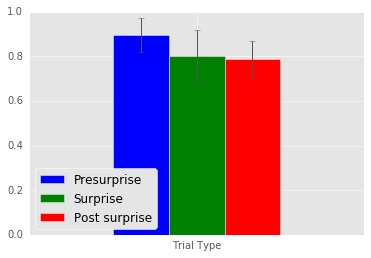

In [7]:
Loc_Acc = df.pivot_table(values='Loc_Acc', index='Sub#', columns='TrialType', aggfunc=np.mean)
CIs = np.array(OneWayConfInterval(Loc_Acc))
Analysis_and_Plot(Loc_Acc, CIs)

Replicating Chen and Wyble, participants perform no worse in the surprise and post surprise trials, indicating that they succesfully found the target. 

Now lets look at participants' ability to report the target's color in the surprise trial and the trial immediately following the surprise test.

Below I plot the percent of participants that correctly identified the target's color in the surprise and post-surprise trials

---------------------------------
Mean Surprise: 0.3
Mean Postsurprise: 0.7
Postsurprise - Surprise: 0.4
---------------------------------
Postsurprise vs Surprise
	 Surprise Test. Comparison to Chance: 17.0 P-value: 0.5899
	 After Surprise Test. Comparison to Chance: 33.0 P-value: 0.024
	 Chi-Square Comparison: 6.4 P-value: 0.0114


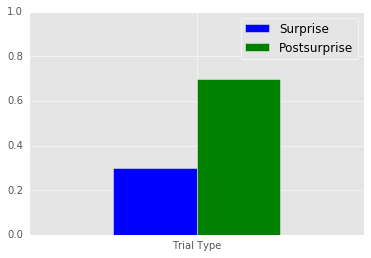

In [8]:
Trial_Trimmer = df['TrialType2'] > 0
Col_Acc = df[Trial_Trimmer].pivot_table(values='Col_Acc', index='Sub#', columns='TrialType2', aggfunc=np.mean)
CIs = SimpleComparisonCI(Col_Acc)
Analysis_and_Plot_2(Col_Acc, CIs)

We perfectly replicate Chen and Wyble; participants respond more accurarely in the post-surprise trial than in the surprise trial. 

The next cell examines participants' ability to report the target's identity on the surprise trial and the trial immediately following the surprise trial. Remember, the participants locate the target based on whether its a letter or number, so they know the broad category of the target. Nonetheless, they cannot report the target's identity on the surprise trial

---------------------------------
Mean Surprise: 0.25
Mean Postsurprise: 0.75
Postsurprise - Surprise: 0.5
---------------------------------
Postsurprise vs Surprise
	 Surprise Test. Comparison to Chance: 15.0 P-value: 0.7226
	 After Surprise Test. Comparison to Chance: 35.0 P-value: 0.014
	 Chi-Square Comparison: 10.0 P-value: 0.0016


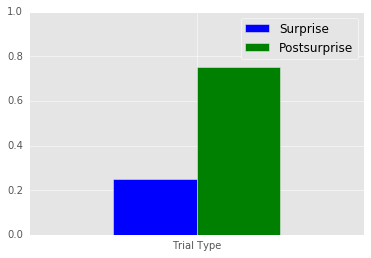

In [9]:
Trial_Trimmer = df['TrialType2'] > 0
Iden_Acc = df[Trial_Trimmer].pivot_table(values='Iden_Acc', index='Sub#', columns='TrialType2', aggfunc=np.mean)
CIs = SimpleComparisonCI(Iden_Acc)
Analysis_and_Plot_2(Iden_Acc, CIs)

#### Experiment 1 - Intertrial analyses

So far, I've perfectly replicated Chen & Wyble (which is good since this is their data). 

Now I want to see if the target's color or identity on the previous trial influences the current trial's performance in the location task. I am only examining presurprise trials, so this should be trials when the participants don't "remember" the target's color or identity.

First I want to make some variables representing whether the target's color and identity repeat across trials.

In [10]:
df['Prev_TarCol'] = df['TarCol'].shift(periods=1)
df['Prev_TarCol_match'] = np.where(df['Prev_TarCol']==df['TarCol'], 1, 2)
df['Prev_Iden'] = df['Tar_Iden'].shift(periods=1)
df['Prev_Iden_match'] = np.where(df['Prev_Iden']==df['Tar_Iden'], 1, 2)
df['Prev_Col+Iden_match'] = np.where((df['Prev_Iden_match']==1) & (df['Prev_TarCol_match']==1), 1, 2)

Lets see what happens when the target's color and identity repeat. 

---------------------------------
Mean match: 0.918
Mean mismatch: 0.8925
Match - Mismatch: 0.0255
---------------------------------
Match vs Mismatch
	 normality test adj. Test value: 0.92 P-value: 0.0821
	 Wilcoxon. Test value: 51.0 P-value: 0.04


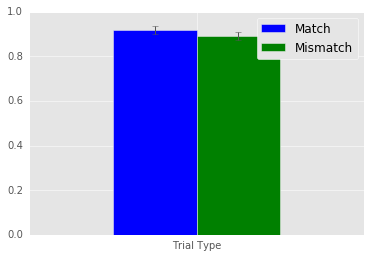

In [11]:
Trial_Trimmer = df['TrialType'] == 0
ColandIden_Acc1 = df[Trial_Trimmer].pivot_table(values='Loc_Acc', index='Sub#', columns='Prev_Col+Iden_match',
                                                aggfunc=np.mean)
CIs = SimpleComparisonCI(ColandIden_Acc1)
Analysis_and_Plot_3(ColandIden_Acc1, CIs)

Looks like a 2.5% increase in accuracy. This time significant. Now, this wasn't really a planned comparison, so please take this result with a grain of salt.

As a sanity check, lets look at how repetitions in the target's location (the reported feature) effect performance. 

We have to quickly create a new variable coding target location repetitions

In [12]:
df['Prev_Loc'] = df['Tar_Loc'].shift(periods=1)
df['Prev_Loc_match'] = np.where(df['Prev_Loc']==df['Tar_Loc'], 1, 2)

---------------------------------
Mean match: 0.9101
Mean mismatch: 0.8883
Match - Mismatch: 0.0218
---------------------------------
Match vs Mismatch
	 normality test adj. Test value: 0.93 P-value: 0.1812
	 T-test adj. Test value: 2.62 P-value: 0.0168


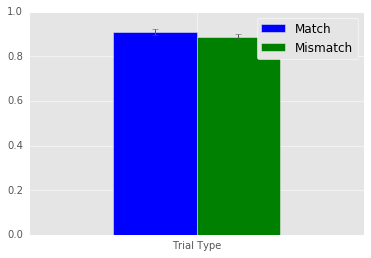

In [13]:
Trial_Trimmer = df['TrialType'] == 0
Loc_Acc1 = df[Trial_Trimmer].pivot_table(values='Loc_Acc', index='Sub#', columns='Prev_Loc_match', aggfunc=np.mean)
CIs = SimpleComparisonCI(Loc_Acc1)
Analysis_and_Plot_3(Loc_Acc1, CIs)

Target location repetitions lead to a 2% increase in performance. Again, this result is robust. 

It's a good sign that this effect is about the same size as repetitions in the unreported features.

### Replicate Experiments 1 Intertrial Analyses with Experiment 1b

Experiment 1 had some evidence that participants unconsciously knew the color and identity of the target, since they performed a little better when the color and identity repeated. The effect was small, so I am not 100% confident that it's robust. 

The best way to demonstrate that this effect is real would be to show that it also exists in another similar Experiment. Chen and Wyble provide a replication of Experiment 1. In this experiment, the only difference is the target and distractors appear for longer and are not masked (making them easier to see). 

If participants response more accurately when the target color and identity repeat in Experiment 1b, then we can be a little more confident that participants are unconsciously aware of the target's color and identity. 

In [14]:
filename = 'Exp1b.csv'
df = pd.read_csv(filename)
df.columns = ['Sub#', 'Block', 'Trial#', 'TarCol', 'Tar_Iden','Tar_Loc', 'Col_Resp', 'Iden_Resp', 'Loc_Resp', 
             'Col_Acc', 'Iden_Acc', 'Loc_Acc'] #naming the columns of the data file.

df['TrialType'] = np.where(df['Trial#']<156, 0, np.where(df['Trial#']==156, 1, 2))
df['TrialType2'] = np.where(df['Trial#']<156, 0, np.where(df['Trial#']==156, 1, np.where(df['Trial#']==157, 2, -1)))

df['Prev_TarCol'] = df['TarCol'].shift(periods=1)
df['Prev_TarCol_match'] = np.where(df['Prev_TarCol']==df['TarCol'], 1, 2)
df['Prev_Iden'] = df['Tar_Iden'].shift(periods=1)
df['Prev_Iden_match'] = np.where(df['Prev_Iden']==df['Tar_Iden'], 1, 2)
df['Prev_Col+Iden_match'] = np.where((df['Prev_Iden_match']==1) & (df['Prev_TarCol_match']==1), 1, 2)

Trial_Trimmer = df['TrialType'] == 0 #only interested in pre-surprise trials
ColandIden_Acc = df[Trial_Trimmer].pivot_table(values='Loc_Acc', index='Sub#', 
                                               columns='Prev_Col+Iden_match', aggfunc=np.mean)

---------------------------------
Mean match: 0.9716
Mean mismatch: 0.9644
Match - Mismatch: 0.0072
---------------------------------
Match vs Mismatch
	 normality test adj. Test value: 0.93 P-value: 0.1875
	 T-test adj. Test value: 2.81 P-value: 0.0112


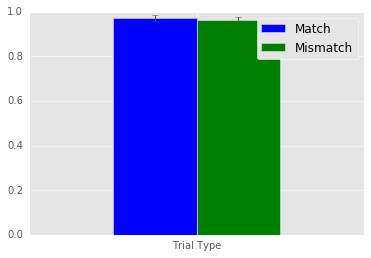

In [15]:
CIs = SimpleComparisonCI(ColandIden_Acc)
Analysis_and_Plot_3(ColandIden_Acc, CIs)

Wow. Only a 1% change in accuracy, so again not big. Nonetheless, this result is signficant. So, Some evidence that participants perform a little better when the targets' color and identity repeat. 

This suggests that participants retain some information about the targets' color and identity even though they cannot explicitly report these attributes. 

Now, I would probably want to replicate this result again before trusting it, but I'm relatively confident that participants unconsciously retain some information about the target's color and identity.



0.857142857143
1.0
0.864864864865
0.993197278912


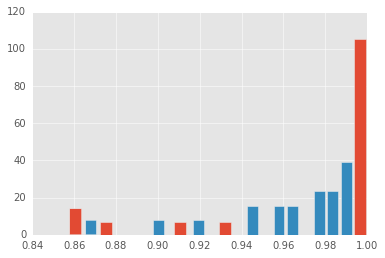

In [16]:
def Histograms(df1,df2):
    x=np.array(df1)
    print np.min(x)
    print np.max(x)
    pl.hist(x, 20, normed=1,histtype='bar', rwidth=0.80)
    x=np.array(df2)
    print np.min(x)
    print np.max(x)
    pl.hist(x, 20, normed=1, histtype='bar', rwidth=0.80);

Histograms(ColandIden_Acc[1],ColandIden_Acc[2])

In [17]:
ColandIden_Acc

Prev_Col+Iden_match,1,2
Sub#,,
12,1.000000,0.992908
13,0.857143,0.959459
14,1.000000,0.993056
15,1.000000,0.944444
16,0.909091,0.965278
17,1.000000,0.979452
18,0.933333,0.964286
19,0.875000,0.959184
20,1.000000,0.993151


In [18]:
scipy.stats.wilcoxon(np.arcsin(np.sqrt(ColandIden_Acc[1])), y=np.arcsin(np.sqrt(ColandIden_Acc[2])))

WilcoxonResult(statistic=45.0, pvalue=0.025068176000876803)